# DS Challenge - Part 2

The steps taken here will be the following:

- Data investigation and manipulation
- Create modelling data
- Model using logisitic regression

Given the timeframe of the task - data manipulation and feature construction will be simplified. More time would be required to do deeper feature reduction and selection

Modelling was produced using 'off the shelf' code, which was tweaked to be relevant

In [1]:
# import libs

import pandas as pd
import numpy as np

In [64]:
import datetime as dt
today = dt.datetime(2017,5,31)

In [2]:
#dsiplay all columns
pd.set_option('display.max_columns', None)

#display longer string for columsn
pd.options.display.max_colwidth = 150

In [47]:
df_order_all = pd.read_csv(r'C:\Users\Suhaib.Qazi\Downloads\DS-Challenge\order_details.txt', sep="\t")
df_visits_all = pd.read_csv(r'C:\Users\Suhaib.Qazi\Downloads\DS-Challenge\visits.txt', sep="\t")

In [10]:
df_order_all.head()

,member_id,order_id,order_date,item_category_id,item_subcategory_id,rev_gbp
0,859a1b2a5fba4552f3a85642c5bf9a7e,357d65f145e2b2883397b22ffd146ccb,2017-06-16,3,31,1.83
1,f3d20a744e8b977cc8ed98498c5ad155,c017417d3e209de3e444517767c2bcee,2017-01-23,1,13,1.51
2,2d9c971585b8ac6766c3df151400f0d4,7dbf66239dd3b1af8314fab826e211c0,2016-12-06,1,13,6.97
3,7422af475194df996c1c7f9f9988beb1,38c3cb8d770c9f8f04b77f4312dac1a1,2017-04-17,3,31,7.57
4,e3a4131d67aee3f351bda573a9fc6529,2f693ef1a7f5183099951a025840c3dc,2016-07-10,1,13,1.73


In [12]:
df_visits_all.head()

,member_id,visit_date,os,devicecat,language,channel
0,d36ef0fd8f31f19c1699e956c7fe239a,2017-06-07,1,1,5,1
1,d5e29109f3f3d9adca0be171e8e9bde7,2017-06-29,1,1,8,3
2,9817c77dc2461492e7ce81eb1bec70da,2017-06-08,4,1,5,1
3,4ce69c8e5d2706d2fa83c1318e2d8c76,2017-06-24,1,1,5,1
4,5c3790d928339a08595c6f634c891ccc,2017-04-06,1,1,5,1


Discard June for feature creation

In [56]:
df_order = df_order_all[(df_order_all['order_date'] < '2017-06-01')]
df_visits = df_visits_all[(df_visits_all['visit_date'] < '2017-06-01')]


Create Dummy Vars

In [57]:
cat_vars=['item_category_id','item_subcategory_id']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_order[var], prefix=var)
    df_order1=df_order.join(cat_list)
    df_order=df_order1

In [58]:
cat_vars=['os','devicecat','language','channel']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df_visits[var], prefix=var)
    df_visits1=df_visits.join(cat_list)
    df_visits=df_visits1

In [185]:
#date type
df_order['order_date'].dtype

dtype('<M8[ns]')

In [68]:
#convert date
df_order['order_date'] = pd.to_datetime(df_order['order_date'])

Summarise data down to member level

In [79]:
df_order_summary = df_order.groupby('member_id').agg({'order_date': lambda x: (today - x.max()).days, 
                                          'order_id': "count", 
                                          'item_category_id': "count",
                                          'item_subcategory_id': "count",
                                          'item_category_id_1': "sum",
                                          'item_category_id_3': "sum",
                                          'item_category_id_5': "sum",
                                          'item_subcategory_id_11': "sum",
                                          'item_subcategory_id_13': "sum",
                                          'item_subcategory_id_16': "sum",
                                          'item_subcategory_id_31': "sum",
                                          'item_subcategory_id_51': "sum"
                                        })

Check for nulls

In [59]:
df_order.isnull().sum()/df_order.shape[0]

member_id                 0.0
order_id                  0.0
order_date                0.0
item_category_id          0.0
item_subcategory_id       0.0
rev_gbp                   0.0
item_category_id_1        0.0
item_category_id_3        0.0
item_category_id_5        0.0
item_subcategory_id_11    0.0
item_subcategory_id_13    0.0
item_subcategory_id_16    0.0
item_subcategory_id_31    0.0
item_subcategory_id_51    0.0
dtype: float64

In [77]:
#convert date
df_visits['visit_date'] = pd.to_datetime(df_visits['visit_date'])

In [80]:
#Summarise data down to member level
df_visits_summary = df_visits.groupby('member_id').agg({'visit_date': lambda x: (today - x.max()).days, 
                                          'os': "count", 
                                          'devicecat': "count",
                                          'language': "count",
                                          'channel': "count",            
                                          'os_1': "sum",
                                          'os_2': "sum",
                                          'os_3': "sum",
                                          'os_4': "sum",
                                          'os_8': "sum",
                                          'os_9': "sum",
                                          'devicecat_1': "sum",
                                          'devicecat_2': "sum",
                                          'devicecat_3': "sum",                                          
                                          'language_1': "sum",
                                          'language_2': "sum",
                                          'language_3': "sum",
                                          'language_4': "sum",
                                          'language_5': "sum",
                                          'language_6': "sum",
                                          'language_7': "sum",
                                          'language_8': "sum",
                                          'language_9': "sum",
                                          'channel_1': "sum",
                                          'channel_2': "sum",
                                          'channel_3': "sum",
                                          'channel_4': "sum",
                                          'channel_5': "sum",
                                          'channel_6': "sum",
                                          'channel_7': "sum",
                                          'channel_8': "sum",
                                          'channel_9': "sum"                                                      
                                        })

Merge orders and visits vars

In [82]:
on_cols = ['member_id']

df_all = pd.merge(df_order_summary, df_visits_summary, on= on_cols)

In [83]:
df_all.head()

,order_date,order_id,item_category_id,item_subcategory_id,item_category_id_1,item_category_id_3,item_category_id_5,item_subcategory_id_11,item_subcategory_id_13,item_subcategory_id_16,item_subcategory_id_31,item_subcategory_id_51,visit_date,os,devicecat,language,channel,os_1,os_2,os_3,os_4,os_8,os_9,devicecat_1,devicecat_2,devicecat_3,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00001f5554977595a5d9f2597dc74759,260,1,1,1,0,1,0,0,0,0,1,0,260,1,1,1,1,0.0,0,0,1.0,0,0,1.0,0,0,0.0,0,1.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0.0
00044f8dc4a61805b03fb8f545c4468e,184,2,2,2,2,0,0,0,2,0,0,0,82,1,1,1,1,0.0,1,0,0.0,0,0,0.0,0,1,0.0,0,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
0006ad5f0be4a5205343070c08fa21d7,323,1,1,1,0,1,0,0,0,0,1,0,323,4,4,4,4,4.0,0,0,0.0,0,0,4.0,0,0,0.0,0,0.0,0,4.0,0,0,0,0,2,2,0,0,0,0,0,0,0.0
000ab7bf9098b2062f1e5c4fd18cb27e,113,2,2,2,0,2,0,0,0,0,2,0,113,3,3,3,3,0.0,0,0,3.0,0,0,3.0,0,0,0.0,0,3.0,0,0.0,0,0,0,0,2,1,0,0,0,0,0,0,0.0
00139c27ebfc43522288694083bec1a8,16,1,1,1,0,1,0,0,0,0,1,0,16,1,1,1,1,1.0,0,0,0.0,0,0,1.0,0,0,0.0,0,0.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


Create target variable and merge with above

In [86]:
df_order_all['order_date'] = pd.to_datetime(df_order_all['order_date'])

In [121]:
june_orders = df_order_all[df_order_all['order_date'] >= today]
june_shoppers = pd.DataFrame(june_orders['member_id'].unique(),columns=['member_id'])
june_shoppers['Shopper'] = 1

In [134]:
df_all2 = pd.merge(df_all, june_shoppers, how='left', on= ['member_id'])
df_all2 = df_all2.fillna(0)

Create splits for modelling

In [161]:
X = df_all2.drop(['member_id', 'Shopper'], axis=1)
y = df_all2.loc[:, df_all2.columns == 'Shopper']

Check for correlation

In [163]:
# calculate the correlation matrix
corr = X.corr()

In [165]:
import seaborn as sns

%matplotlib inline 
# to display charts in jupyter notebook

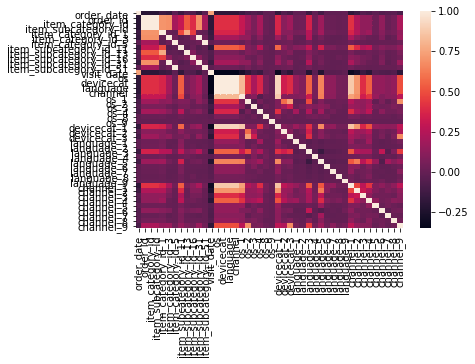

In [166]:
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Some colinearity but will skip variable reduction for now

### Model Creation

In [ ]:
#import relevant libs

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

#create train/test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [182]:
#Create logistic regression model and fit on test data
lg = LogisticRegression()
lg.fit(X_train,y_train)
prediction = lg.predict(X_test)
print ('Logistic Regression Model accuracy : {}'.format(accuracy_score(y_test,prediction)))

C:\Users\Suhaib.Qazi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Model accuracy : 0.7375753012048193


Confusion matrix

In [183]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1798  108]
 [ 589  161]]


TP is  is 161 - thats 60%

Although model accuracy is 74%, TP is lower. This is not unexpected as probability of someone NOT shopping in June is higher than a customer that is - so would be easier to have True Negative by chance.

# ROC

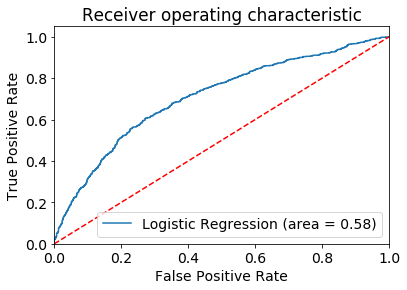

In [184]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Area under curve for ROC is 58% - similar to TP. Shows improvements need to be made on model